# Quickstart

In this section we'll do a circuit through what ``geoplot`` can do.

In [1]:
import sys; sys.path.insert(0, '../../')  # ignore this
import geoplot as gplt

%matplotlib inline

Suppose that we have data on localities in the United States. We'll like to do a bit of exploratory analysis to determine what interesting things we can find in it.

Our raw data is in the form of a ``shapefile``, and we start off by loading that data into a ``geopandas`` ``GeoDataFrame`` (if this all sounds unfamiliar, be sure to read the section on [working with data](../Data.ipynb) to learn more).

In [53]:
import geopandas as gpd

cities = gpd.read_file("../../data/cities/citiesx010g.shp")
continental_cities = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]
continental_cities = continental_cities[continental_cities['POP_2010'] >= 100000]

In [54]:
import pandas as pd
pd.set_option('max_columns', 6)  # Unclutter display.

continental_cities.head()

,ANSICODE,COUNTY,COUNTYFIPS,...,STATE,STATE_FIPS,geometry
177,1036030,Cass,017,...,ND,38,POINT (-96.78980339999998 46.87718630000012)
373,979426,Monroe,055,...,NY,36,POINT (-77.61555679999998 43.15478450000012)
378,979539,Onondaga,067,...,NY,36,POINT (-76.14742439999998 43.04812210000017)
386,978764,Erie,029,...,NY,36,POINT (-78.87836889999994 42.8864468000001)
426,618227,Middlesex,017,...,MA,25,POINT (-71.31617179999989 42.63342470000003)


Let's use ``pointplot`` ([docs](../pointplot.html)) to see where our cities are.

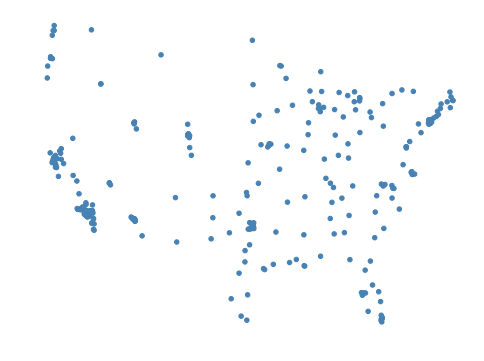

In [55]:
gplt.pointplot(continental_cities)

Hmm. This data isn't easily interpretable because it lacks geospatial context: it's impossible to tell where these points actually are, exactly. Let's use a ``polyplot`` ([docs](../polyplot.html)) to add the US states to the map.

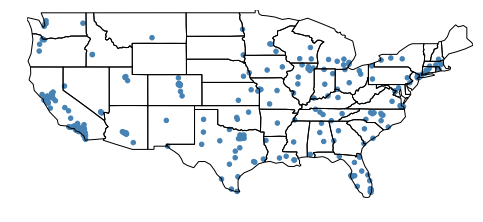

In [58]:
usa = gpd.read_file("../../data/united_states/usa.geojson")
continental_usa = usa[~usa['adm1_code'].isin(['USA-3517', 'USA-3563'])]

ax = gplt.polyplot(continental_usa)
gplt.pointplot(continental_cities, ax=ax)
ax.set_aspect("equal")

This is better, but if you're familiar with typical depictions of the United States, you'll notice that this map seems a bit distorted.

You may recall from geography that the Earth, being a sphere, is impossible to accurately potray on a two-dimensional map; the best we can do is pick a method of "unpeeling" it, a projection, which is well-suited for the purpose we have in mind.

In this case we haven't used any projection at all: we're plotting using raw coordinates. 

So we can "fix" the distortion by using an appropriate projection. The Albers equal area projection is most common in the United States.

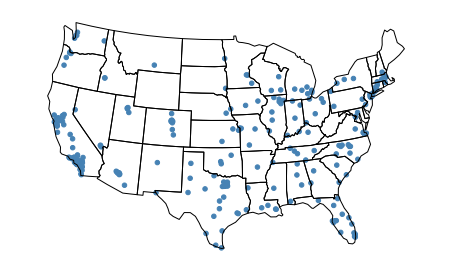

In [62]:
import geoplot.crs as gcrs

proj = gcrs.AlbersEqualArea()# central_longitude=-98, central_latitude=39.5)

ax = gplt.polyplot(continental_usa, projection=proj)
gplt.pointplot(continental_cities, ax=ax, projection=proj)

# ax.set_ylim((-1597757, 1457718)); pass

In [63]:
continental_cities.columns

Index(['ANSICODE', 'COUNTY', 'COUNTYFIPS', 'ELEV_IN_FT', 'ELEV_IN_M',
       'FEATURE', 'FEATURE2', 'GNIS_ID', 'LATITUDE', 'LONGITUDE', 'NAME',
       'POP_2010', 'PopPlLat', 'PopPlLong', 'STATE', 'STATE_FIPS', 'geometry'],
      dtype='object')

To learn more about this, and to see what options you have available, be sure to read the section of the tutorial on [projections](../Projections.ipynb).

Ok great. Let's adjust this plot to make it a bit more informative. Our data contains information on the population of our cities; let's encode this using the ``scale`` of our points.

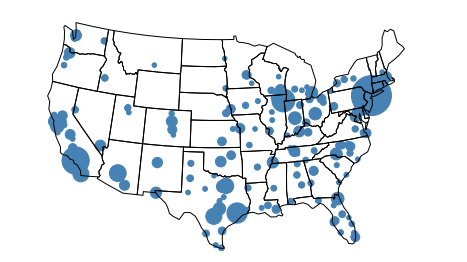

In [65]:
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)

ax = gplt.polyplot(continental_usa, projection=proj)
gplt.pointplot(continental_cities, 
               scale='POP_2010',
               limits=(1, 80),  # Make our largest city 80x our smallest.
               ax=ax, projection=proj)

ax.set_ylim((-1597757, 1457718)); pass

Let's add some visual configuration to prettify the map and keep the points for dissappearing inside of one another...

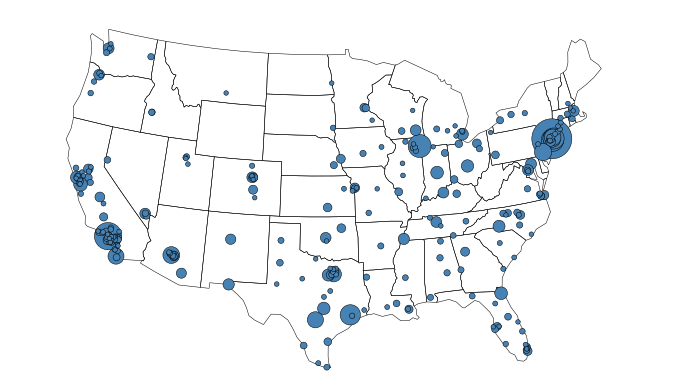

In [78]:
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)

ax = gplt.polyplot(continental_usa, 
                   projection=proj,
                   zorder=-1,  # Put the polyplot below the pointplot.
                   linewidth=0.5,  # Make state borders thinner.
                   figsize=(12, 12))  # Increase the size of the figure.
gplt.pointplot(continental_cities, 
               scale='POP_2010',
               limits=(1, 80),
               linewidth=0.5,  # Give the points a border...
               edgecolor='black',  # ...and color it black.
               ax=ax, projection=proj)

ax.set_ylim((-1597757, 1457718)); pass

Great! But to make the scale more obvious, let's add a legend.

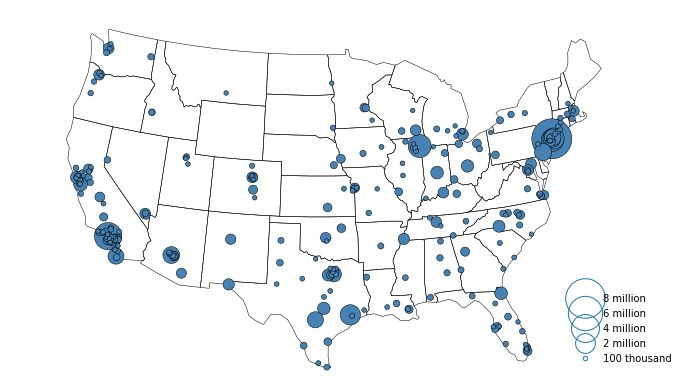

In [86]:
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)

ax = gplt.polyplot(continental_usa, 
                   projection=proj,
                   zorder=-1,
                   linewidth=0.5,
                   figsize=(12, 12))
gplt.pointplot(continental_cities, 
               scale='POP_2010',
               limits=(1, 80),
               linewidth=0.5,
               edgecolor='black',
               legend=True,  # Add a legend.
               legend_values=[8000000, 6000000, 4000000, 2000000, 100000],
               legend_labels=['8 million', '6 million', '4 million', '2 million', '100 thousand'],
               # Change the legend display to better fit our values.
               legend_kwargs={'frameon': False, 'loc': 'lower right'},
               # Turn off the legend frame and pin it to the bottom right.
               ax=ax, projection=proj)

ax.set_ylim((-1597757, 1457718)); pass

Great! We can emphasize even further by also scaling the ``hue``, and giving the whole thing a title.

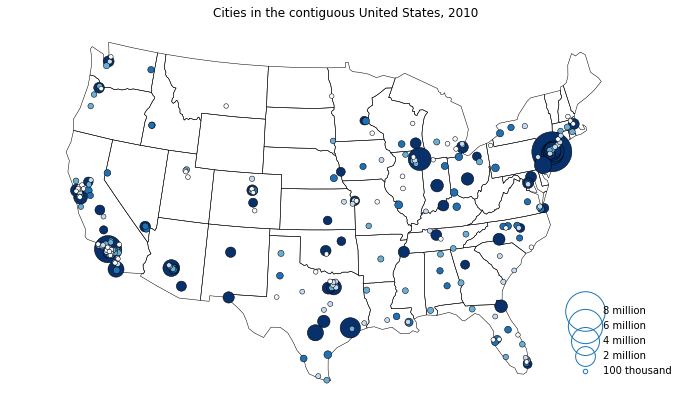

In [89]:
import matplotlib.pyplot as plt

proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)

ax = gplt.polyplot(continental_usa, 
                   projection=proj,
                   zorder=-1,
                   linewidth=0.5,
                   figsize=(12, 12))
gplt.pointplot(continental_cities, 
               scale='POP_2010',
               limits=(1, 80),
               hue='POP_2010',  # Add a hue variable.
               cmap='Blues',  # cf. matplotlib.org/examples/color/colormaps_reference.html
               legend_var='scale',  # Keep the legend based on scale, not on hue.
               linewidth=0.5,
               edgecolor='black',
               legend=True,
               legend_values=[8000000, 6000000, 4000000, 2000000, 100000],
               legend_labels=['8 million', '6 million', '4 million', '2 million', '100 thousand'],
               legend_kwargs={'frameon': False, 'loc': 'lower right'},
               ax=ax, projection=proj)

ax.set_ylim((-1597757, 1457718)); pass

plt.title("Cities in the contiguous United States, 2010")  # Add a title!

And there you go!

This plot&mdash;which you can see as a [standalone example](../examples/largest-cities-usa.html) in the Gallery&mdash;demonstrates many of the options you have available for configuring things to look the way you want them.

So far we've loaded some data, put it on a map, loaded some shapes, projected the two, and explored what we can do with them using a ``pointplot``&mdash;one of the six map types available in ``geoplot``.

The API for the remaining five plot types is very similar to what we just saw, and so for the remainder of this quick walkthrough let's look at some simple examples from other parts of ``geoplot``.

Let's start with traffic collisions in New York City. As you might expect, these tend to happen in certain places more often than others; but can we figure out where? This is a bit difficult to do with just points on a map: there are too many accidents, resulting in too much overplotting. Instead, let's use ``kdeplot`` ([docs](../polyplot.html))
to tell this story.

First we load the data...

In [3]:
import pandas as pd
import shapely

collisions = pd.read_csv("../../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)
collisions = collisions[collisions['LOCATION'].notnull()]
collision_points = collisions.apply(lambda srs: shapely.geometry.Point(srs['LONGITUDE'], srs['LATITUDE']),
                                    axis='columns')
collisions = gpd.GeoDataFrame(collisions, geometry=collision_points)

boroughs = gpd.read_file("../../data/nyc_boroughs/boroughs.geojson", driver='GeoJSON')

And then we plot it!

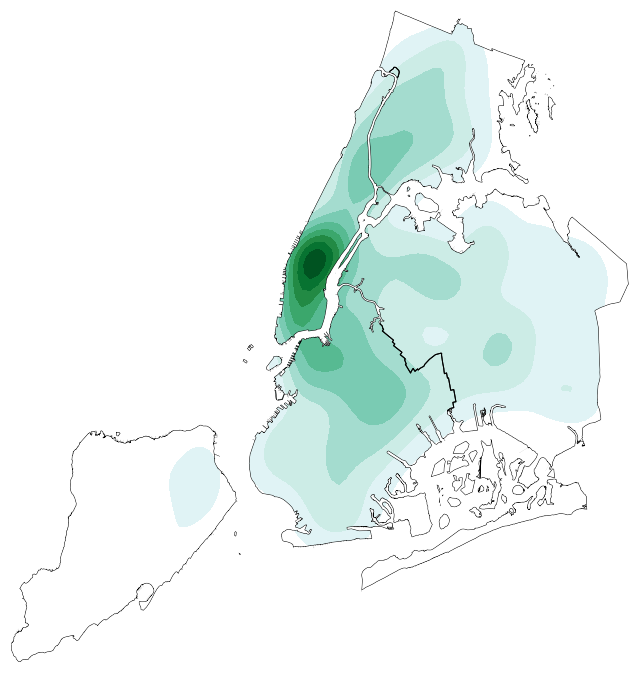

In [94]:
ax = gplt.kdeplot(collisions.sample(5000), 
                  projection=gcrs.AlbersEqualArea(), 
                  shade=True,  # Shade the areas or draw relief lines?
                  shade_lowest=False,  # Don't shade near-zeros.
                  clip=boroughs.geometry,  # Constrain the heatmap to this area.
                  figsize=(12,12))
gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea(), ax=ax)

Looks like traffic accidents are centered on Midtown.

The two plot types so far are concerned with points. Something we're interested not in points but in the movement between them. In these cases we can use a ``sankey`` diagram ([docs](../sankey.html)), like this one of road traffic volumes in Washington DC:

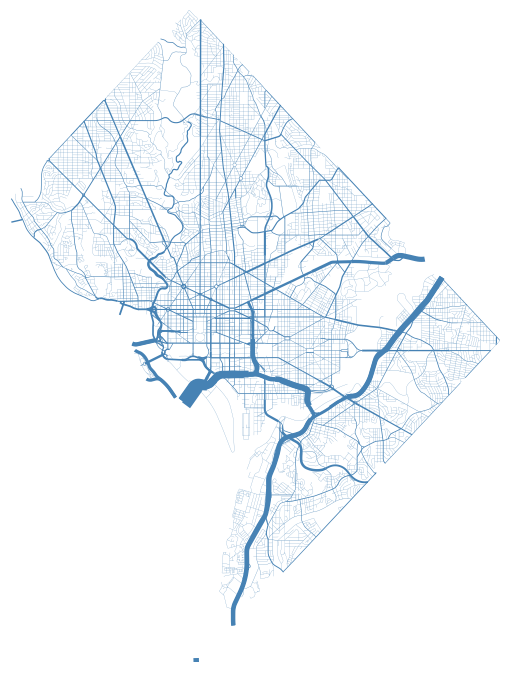

In [101]:
dc = gpd.read_file("../../data/us_roads/District_Sections.shp")


gplt.sankey(dc, 
            path=dc.geometry,  # The paths are roadway segments.
            projection=gcrs.AlbersEqualArea(), 
            scale='aadt',  # The variable we'll use to scale the result.
            limits=(0.1, 10),  # The limits in terms of width.
            figsize=(12,12))

At other times our data comes attached polygons instead of points. For these we can create a ``choropleth`` ([docs](../choropleth)):

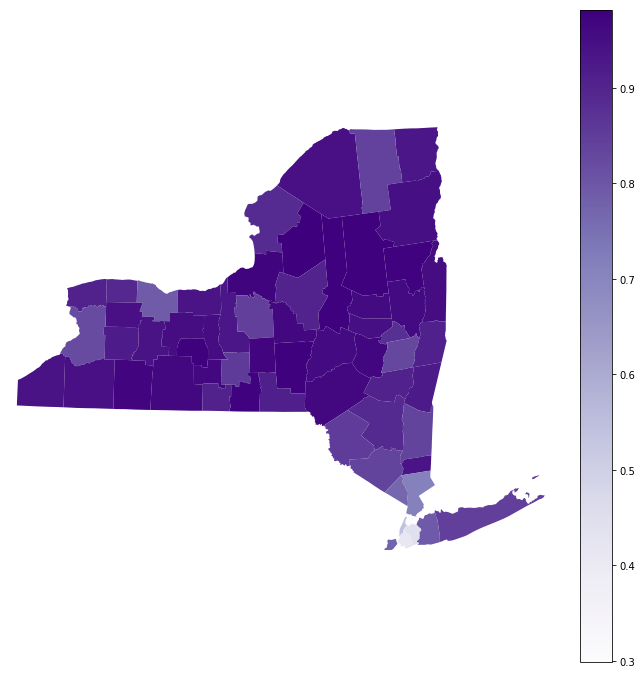

In [105]:
# Load the data.
census_tracts = gpd.read_file("../../data/ny_census_2010/cty036.shp")
percent_white = census_tracts['WHITE'] / census_tracts['POP2000']


# Plot the data.
gplt.choropleth(census_tracts, 
                hue=percent_white,  # Display data, passed as a Series
                projection=gcrs.AlbersEqualArea(),
                cmap='Purples', 
                linewidth=0.5, 
                k=None,  # Do not bin our counties.
                legend=True,
                figsize=(12, 12))

Or a ``cartogram`` ([docs](../cartogram.html)):

/home/alex/anaconda3/envs/geoplot/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/alex/anaconda3/envs/geoplot/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(-1597757.3894385984, 1457718.4893930717)

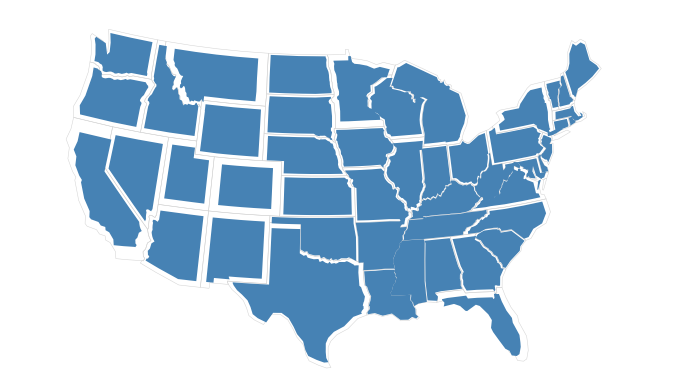

In [107]:
obesity = pd.read_csv("../../data/obesity/obesity_by_state.tsv", sep='\t')
usa = gpd.read_file("../../data/united_states/usa.geojson")
continental_usa = usa[~usa['adm1_code'].isin(['USA-3517', 'USA-3563'])]
continental_usa['State'] = [
    'Minnesota', 'Montana', 'North Dakota', 'Idaho', 'Washington', 'Arizona',
    'California', 'Colorado', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Wyoming',
    'Arkansas', 'Iowa', 'Kansas', 'Missouri', 'Nebraska', 'Oklahoma', 'South Dakota',
    'Louisiana', 'Texas', 'Connecticut', 'Massachusetts', 'New Hampshire',
    'Rhode Island', 'Vermont', 'Alabama', 'Florida', 'Georgia', 'Mississippi',
    'South Carolina', 'Illinois', 'Indiana', 'Kentucky', 'North Carolina', 'Ohio',
    'Tennessee', 'Virginia', 'Wisconsin', 'West Virginia', 'Delaware', 'District of Columbia',
    'Maryland', 'New Jersey', 'New York', 'Pennsylvania', 'Maine', 'Michigan'
]
continental_usa['Obesity Rate'] = continental_usa['State'].map(
    lambda state: obesity.query("State == @state").iloc[0]['Percent']
)


# Plot the data.
ax = gplt.cartogram(continental_usa, scale='Obesity Rate',
                    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
                    limits=(0.75, 1),
                    linewidth=0.5, 
                    facecolor='steelblue', 
                    trace_kwargs={'linewidth': 0.5},
                    figsize=(12, 12))
ax.set_ylim((-1597757.3894385984, 1457718.4893930717))

There's one more plot type, ``aggplot``, which looks a lot like a choropleth but is a bit more complex because it attempts to handle aggregating points into polygons for you. To see what that's about, [read its documentation](../aggplot.html).

That concludes our quick introduction to ``geoplot``. If you're a novice with geospatial data in Python, I suggest leafing through the rest of the tutorial materials. To see more examples refer to the [Gallery](../Gallery.html). To get started using ``geoplot`` in your own projects, refer to [Installation](../Installation.html) and the [API Reference](../api.html).